# Librairies

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3166 (delta 3), reused 5 (delta 0), pack-reused 3157
Receiving objects: 100% (3166/3166), 23.92 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (72/72), done.
['free-spoken-digit-dataset/recordings/6_yweweler_21.wav', 'free-spoken-digit-dataset/recordings/6_yweweler_13.wav']
2000
[-0.015625  -0.0078125 -0.015625  ... -0.015625  -0.0078125 -0.0078125] 8000
<class 'numpy.ndarray'>


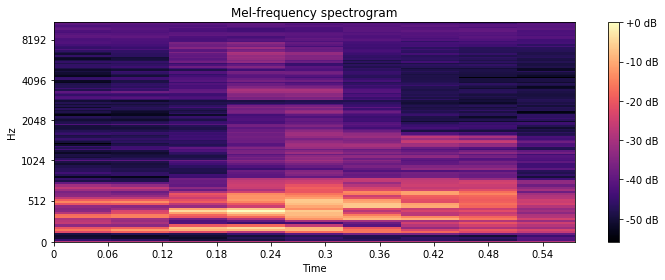

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Conversion des fichiers audio en melspectrogrammes



La plus longue dimension temporelle est 36
Traitement des melspectrogrammes pour qu'ils aient la même durée



Traitement des melspectrogrammes pour qu'ils aient la même durée


In [0]:
#@title MEL SPECTROGRAM
#!rm -rf /content/melspectrogram/ #supprime le dossier melspectrogram si problèmes
!pip install librosa # installation de la librairie librosa
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset #téléchargement du jeu de données
!mkdir /content/melspectrogram #création du dossier qui contiendra les mel-spectrogrammes

import glob # librairie spécialisée dans la recherche de chemin
list_of_files = glob.glob("free-spoken-digit-dataset/recordings/*") #permet d'obtenir le chemin relatif de tous les fichiers du dossier recordings
print(list_of_files[:2])

n_files = len(list_of_files) # nombres de fichiers audios
print(n_files)

import librosa
y, sr = librosa.load(list_of_files[3], sr= 8000)
#y est le signal sous forme d'array numpy, sr est
#le taux d'échantillonage (vaut 8khz  d'après les indications github)
print(y, sr)

import numpy as np
# calcul du melspectrogramme
sp = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
#conversion de l'amplitude en dB pour une meilleure comprehension
s_dB = librosa.power_to_db(sp, ref=np.max)

print(type(s_dB))

from IPython.display import Audio
Audio(y,rate=sr) # permet de lire un fichier audio sous forme d'array numpy dans un notebook jupyter ou dans colab

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

def plot_spec(S_dB):
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr)
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel-frequency spectrogram')
  plt.tight_layout()
  plt.show()
plot_spec(s_dB)


n_mels=128
sr = 8000


def compute_spectrogram(path):
    "Calcule le melspectrogramme du fichier audio situé à path dans le repertoire de fichiers"
    file_name = os.path.basename(path) 
    s , _ = librosa.load(path, sr= sr) # sr est le taux d'échantillonnage du signal.
    
    melspec = librosa.feature.melspectrogram(y=s, sr=sr, n_mels=n_mels)
    melspec_db = librosa.power_to_db(melspec, ref=np.max)
    melspec_db_image = melspec_db.reshape(melspec_db.shape[0],melspec_db.shape[1],1) # on rajoute la dimension 1 à la fin pour forcer la représentation en tant qu'image (hauteur, largeur, nombre de couleurs ici égale à 1)
    return (path,melspec_db_image)

def get_duration(spec):
  "Renvoie la dimension correspondant à l'axe temporel d'un melspectrogramme"
  return spec.shape[1]

def get_longest_duration(list_path_spec):
  "Renvoie la dimension temporelle du melspectrogramme le plus long"
  list_time = [get_duration(spec) for path, spec in list_path_spec ]
  return max(list_time)

def save_melspec(path_melspec): 
    """
    Permet d'enregistrer les spectrogrammes dans le dossier melspectrogram
    """
    path, melspec = path_melspec
    file_name = os.path.basename(path)
    melspec_path = os.path.join("/content/melspectrogram", os.path.splitext(file_name)[0])
    np.save(melspec_path, melspec)
    #print("{} saved".format(melspec_path))


import os
from tqdm.autonotebook import tqdm # bar de remplissage pour visualiser l'évolution du calcul et de l'enregistrement des spectrogrammes
import sys
import tensorflow as tf
n=n_files



print("Conversion des fichiers audio en melspectrogrammes")
list_spec = []
for path, spec in tqdm(map(compute_spectrogram, list_of_files[:n]), total=n):
   list_spec.append((path, spec))
   

max_time = get_longest_duration(list_spec)
print("La plus longue dimension temporelle est {}".format(max_time))
def spec_padding(path_data):
  path, spec = path_data
  min_spec = np.min(spec)
  spec_padded = np.pad(spec, ((0,0),(0,max_time-spec.shape[1]),(0,0)),"constant",constant_values=((min_spec,min_spec), (min_spec,min_spec),(min_spec,min_spec)))
  return (path, spec_padded)



print("Traitement des melspectrogrammes pour qu'ils aient la même durée")
list_padded_spec = []
for path, spec_padded in tqdm(map(spec_padding, list_spec[:n]), total=n):
  list_padded_spec.append((path,spec_padded))
  


print("Traitement des melspectrogrammes pour qu'ils aient la même durée")
for spec in tqdm(map(save_melspec, list_padded_spec[:n]), total=n):
  pass

__main__
_test_cm: test function with confusion matrix done
and pause


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:165: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:167: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:168: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: In future, it will be an error for 'np.

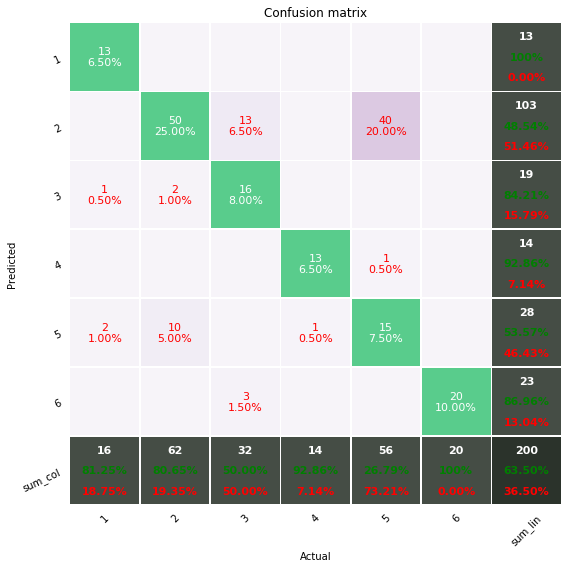

_test_data_class: test function with y_test (actual values) and predictions (predic)


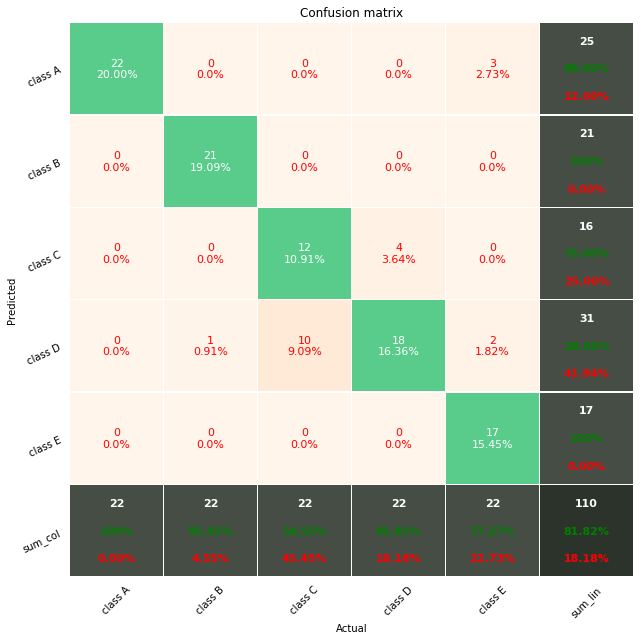

In [0]:
#@title LIBRAIRIE CONFUSION MATRIX
# -*- coding: utf-8 -*-
"""
plot a pretty confusion matrix with seaborn
Created on Mon Jun 25 14:17:37 2018
@author: Wagner Cipriano - wagnerbhbr - gmail - CEFETMG / MMC
REFerences:
  https://www.mathworks.com/help/nnet/ref/plotconfusion.html
  https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python
  https://www.programcreek.com/python/example/96197/seaborn.heatmap
  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/31720054
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
"""

#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#



#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    array = np.array( [[13,  0,  1,  0,  2,  0],
                       [ 0, 50,  2,  0, 10,  0],
                       [ 0, 13, 16,  0,  0,  3],
                       [ 0,  0,  0, 13,  1,  0],
                       [ 0, 40,  0,  1, 15,  0],
                       [ 0,  0,  0,  0,  0, 20]])
    #get pandas dataframe
    df_cm = DataFrame(array, index=range(1,7), columns=range(1,7))
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#

def _test_data_class():
    """ test function with y_test (actual values) and predictions (predic) """
    #data
    y_test = np.array([1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    predic = np.array([1,2,4,3,5, 1,2,4,3,5, 1,2,3,4,4, 1,4,3,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,3,5, 1,2,3,3,5, 1,2,3,4,4, 1,2,3,4,1, 1,2,3,4,1, 1,2,3,4,1, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 12;
    figsize = [9,9];
    if(len(y_test) > 10):
        fz=9; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test, predic, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)
#


#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
    _test_cm()
    plt.pause(5)
    print('_test_data_class: test function with y_test (actual values) and predictions (predic)')
    _test_data_class()

In [0]:
#@title fonction gerer data pour avant le modele, fonctions adapter pour confusion matrice
import os
import random

def importer(nom_fich):
  """nom_fich = nom du fichier à importer
  sortie = couple [data, [chiffre, speaker, occurrence]]"""

#charger le fichier .npy dans "data"
  data = np.load("melspectrogram/" + nom_fich)

#retirer l'extension ".npy"
  infos = nom_fich[0:-4]

#transformer "0_jackson_4" en ["0", "jackson, "4"]
  infos = infos.split("_")

  return data, infos

        
def gerer_data(pourcent, quoi_tester, random_ou_pas=0):
  """quoi tester : (0=chiffre) (1=speaker)
  pourcent : pourcentage données d'entrainement demandée
  random_ou_pas : mélanger les données ou garder l'ordre par défaut
  output : X_train, Y_train, X_test, Y_test"""

#Création de nos listes vides
  X_train, Y_train, X_test, Y_test = [],[],[],[]

  list = os.listdir('melspectrogram/')
#Mélanger ou non les données
  if random_ou_pas == 1:
    random.shuffle(list)
  
#Importation des données dans X_train et Y_train grâce à "importer()"
  for i in range(len(list)):
    X_train.append(importer(list[i])[0])
    Y_train.append(importer(list[i])[1][quoi_tester])
  
#Transformer le nom du speaker en array (lisible par les réseaux de neurones)
  if quoi_tester == 1:
    for i in range(len(Y_train)):
      if Y_train[i] == "jackson":
        Y_train[i] = np.array([1,0,0,0])
      if Y_train[i] == "nicolas":
        Y_train[i] = np.array([0,1,0,0])
      if Y_train[i] == "theo":
        Y_train[i] = np.array([0,0,1,0])
      if Y_train[i] == "yweweler":
        Y_train[i] = np.array([0,0,0,1])

#Transformer le chiffre en array (lisible par les réseaux de neurones)
  if quoi_tester == 0:
    for i in range(len(Y_train)):
      indice = int(Y_train[i])
      Y_train[i]=[0,0,0,0,0,0,0,0,0,0]
      Y_train[i][indice] = 1

#Mettre une partie des données dans X_test et Y_test
  X_test = X_train[0:round((1-pourcent)*2000)]
  Y_test = Y_train[0:round((1-pourcent)*2000)]
  X_train = X_train[round((1-pourcent)*2000):]
  Y_train = Y_train[round((1-pourcent)*2000):]

  return X_train, Y_train, X_test, Y_test

def adapter(L_entree): 
  """transformer [ [0,1,0,0],[0,0,1,0], ... en [1,2,3,1,0...]"""
  L_sortie = []
  #pour chaque liste de L_entree (de la forme [0,1,0,0])
  for i in range(len(L_entree)):
    #empiler l'indice du maximum de [0,1,0,0] dans L_sortie
    L_sortie.append(list(L_entree[i]).index(max(list(L_entree[i]))))
  return L_sortie

def remettre_0_ou_1_dans_Y_pred(Y_pred):
  """transformer [0.001, 0.001, 0.9999,...] en [0, 0, 1,...] """

  #Pour chaque liste de Y_pred (de la forme [0.001, 0.001, 0.9999,...] )
  for i in range(len(Y_pred)):
    
    #Remplacer la valeur maximum par 1
    imax = list(Y_pred[i]).index(max(list(Y_pred[i])))
    Y_pred[i][imax]= 1

    #Mettre à 0 toutes les autres valeurs
    for k in range(len(Y_pred[i])):
      if Y_pred[i][k] != 1:
        Y_pred[i][k]=0

  return Y_pred





# Réseau qui identifie les chiffres

In [0]:
#@title Le modèle pour les chiffres et son entrainement

        
# On utilisera Keras
import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout


# Création du modèle
model2 = Sequential()
# input: images de 128x36x1
# On applique des conv2D
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 36, 1)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
# Enregistrer le modèle
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])



#Séparer nos données entre "train" et "test"
X_train, Y_train, X_test, Y_test=(gerer_data(0.5,0,1))

print(np.asarray(Y_train).shape)

#Entrainement du modèle
model2.fit(np.asarray(X_train), np.asarray(Y_train), epochs=100, batch_size=10)

print('shape de nos fichiers .npy importés:')
X_train[3]



(1000, 10)
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2.4876 - acc: 0.0900
Epoch 2/100
1000/1000 [==============================] - 1s 702us/step - loss: 2.3025 - acc: 0.1090
Epoch 3/100
1000/1000 [==============================] - 1s 688us/step - loss: 2.2990 - acc: 0.1140
Epoch 4/100
1000/1000 [==============================] - 1s 723us/step - loss: 2.3011 - acc: 0.1350
Epoch 5/100
1000/1000 [==============================] - 1s 711us/step - loss: 2.2871 - acc: 0.1390
Epoch 6/100
1000/1000 [==============================] - 1s 705us/step - loss: 2.2790 - acc: 0.1490
Epoch 7/100
1000/1000 [==============================] - 1s 702us/step - loss: 2.2467 - acc: 0.1570
Epoch 8/100
1000/1000 [==============================] - 1s 708us/step - loss: 2.2059 - acc: 0.1750
Epoch 9/100
1000/1000 [==============================] - 1s 702us/step - loss: 2.1292 - acc: 0.2330
Epoch 10/100
1000/1000 [==============================] - 1s 704us/step - loss: 2.0295 - ac

array([[[-43.28439095],
        [-44.66571752],
        [-50.32324929],
        ...,
        [-66.68075381],
        [-66.68075381],
        [-66.68075381]],

       [[-41.60676242],
        [-44.76745793],
        [-51.08802257],
        ...,
        [-66.68075381],
        [-66.68075381],
        [-66.68075381]],

       [[-45.4472857 ],
        [-47.85611858],
        [-55.09675264],
        ...,
        [-66.68075381],
        [-66.68075381],
        [-66.68075381]],

       ...,

       [[-41.10349932],
        [-44.51462282],
        [-40.63713197],
        ...,
        [-66.68075381],
        [-66.68075381],
        [-66.68075381]],

       [[-49.86809573],
        [-53.33717718],
        [-52.00746249],
        ...,
        [-66.68075381],
        [-66.68075381],
        [-66.68075381]],

       [[-66.68075381],
        [-66.22391692],
        [-64.37199182],
        ...,
        [-66.68075381],
        [-66.68075381],
        [-66.68075381]]])

In [0]:
#@title générer X et Y des chiffres, faire prediction, adapter resultats, afficher matrice de confusion sklearn.metrics

#Calculer les resultats (Y_prediction) avec notre modèle entrainé
Y_pred = model2.predict(np.asarray(X_test))

#Transformer les résultats : [0.001, 0.001, 0.9999,...] -> [0, 0, 1,...]
Y_pred = remettre_0_ou_1_dans_Y_pred(Y_pred)

#Transformer [ [0,1,0,0] , [0,0,1,0]]... ] en [1,2,3,1,0...]
Y_test_mat = adapter(Y_test)
Y_pred_mat = adapter(Y_pred)


#Afficher matrice
from sklearn.metrics import confusion_matrix
Matrice = confusion_matrix(Y_test_mat, Y_pred_mat)

print(Matrice)




[[102   0   0   0   0   0   0   0   0   0]
 [  0 101   0   0   0   3   0   0   0   1]
 [  1   0 100   1   0   0   0   0   0   0]
 [  0   0   0 101   0   0   3   0   2   0]
 [  0   0   0   0  98   0   0   0   0   0]
 [  0   0   0   0   2  87   0   0   0   0]
 [  1   0   1   0   0   0  89   0   4   0]
 [  0   0   0   0   2   5   0  89   0   2]
 [  0   0   0   1   0   0   1   0 102   0]
 [  0   0   0   0   0   2   0   0   0  99]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:165: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:167: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:168: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: In future, it will be an error for 'np.

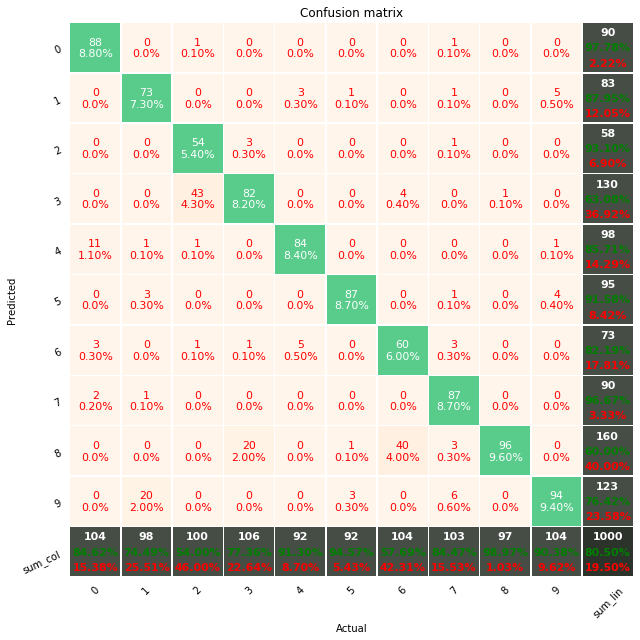

In [0]:
#@title Afficher pretty_plot_confusion_matrix des chiffres prédits

plot_confusion_matrix_from_data(Y_test_mat, Y_pred_mat, columns=["0","1","2","3","4","5","6","7","8","9"], annot=True, cmap="Blue",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin')

# Réseau qui identifie les noms

In [55]:
#@title Le modele pour nom et son entrainement


# Création du modèle
import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout



model = Sequential()
# input: images de 128x36x1
# On applique des conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 36, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])


#Séparer nos données entre "train" et "test"
X_train, Y_train, X_test, Y_test=(gerer_data(0.5,1,1))

print(np.asarray(Y_train).shape)

#Entrainement du modèle
model.fit(np.asarray(X_train), np.asarray(Y_train), epochs=14, batch_size=10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(1000, 4)
Epoch 1/14
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4787 - acc: 0.2490
Epoch 2/14
1000/1000 [==============================] - 1s 722us/step - loss: 1.3353 - acc: 0.3390
Epoch 3/14
1000/1000 [==============================] - 1s 707us/step - loss: 1.2125 - acc: 0.4390
Epoch 4/14
1000/1000 [==============================] - 1s 721us/step - loss: 1.1703 - acc: 0.4960
Epoch 5/14
1000/1000 [==============================] - 1s 715us/step - loss: 1.1087 - acc: 0.5380
Epoch 6/14
1000/1000 [==============================] - 1s 708us/step - loss: 1.0564 - acc: 0.5420
Epoch 7/14
1000/1000 [==============================] - 1s 707us/step - loss: 1.0271 - acc: 0.5700
Epoch 8/14
1000/1000 [==============================] - 1s 712us/step - loss: 0.9137 - acc: 0.6300
Epoch 9/14
1000/1000 [==============================] - 1s 724us/step - loss: 0.8305 - acc: 0.6570
Epoch 10/14
1000/1000 [==============================] - 1s 698us/step - loss: 0.8302 - acc: 0.6620
E

In [57]:
#@title générer X et Y des noms, faire prediction, adapter resultats, afficher matrice de sklearn.metrics



#Calculer les resultats (Y_prediction) avec notre modèle entrainé
Y_pred = model.predict(np.asarray(X_test))

#Transformer les résultats : [0.001, 0.001, 0.9999,...] -> [0, 0, 1,...]
Y_pred = remettre_0_ou_1_dans_Y_pred(Y_pred)

#Transformer [ [0,1,0,0] , [0,0,1,0]... ] en [1,2,3,1,0...]
Y_test_mat = adapter(Y_test)
Y_pred_mat = adapter(Y_pred)

#Afficher matrice
from sklearn.metrics import confusion_matrix
Matrice = confusion_matrix(Y_test_mat, Y_pred_mat)

print(Matrice)




[[246   1  12   1]
 [  6 228   5   5]
 [ 44   5 191  12]
 [ 12   2  37 193]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:165: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:167: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:168: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: In future, it will be an error for 'np.

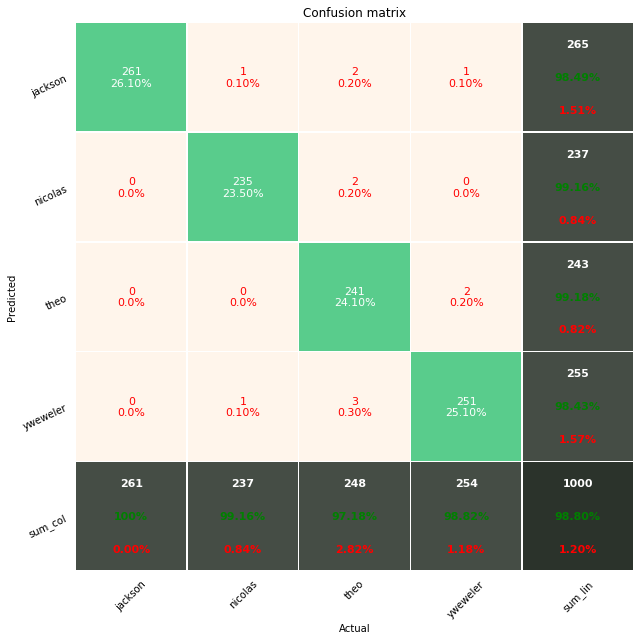

In [0]:
#@title Afficher pretty_plot_confusion_matrix des speakers
plot_confusion_matrix_from_data(Y_test_mat, Y_pred_mat, columns=["jackson","nicolas","theo","yweweler"], annot=True, cmap="Blue",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin')

# Faire varier le Dropout

In [0]:
#@title Création du modèle
   
# Création du modèle


import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout


def creation_modele(val_dropout):

  model = Sequential()
  # input: images de 128x36x1
  # On applique des conv2D
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 36, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(val_dropout))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(val_dropout))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(val_dropout))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(val_dropout))
  model.add(Dense(4, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

  return model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.0
Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 1.4869 - acc: 0.2690
Epoch 2/50
1000/1000 [==============================] - 1s 676us/step - loss: 1.3171 - acc: 0.3670
Epoch 3/50
1000/1000 [==============================] - 1s 683us/step - loss: 1.1800 - acc: 0.4380
Epoch 4/50
1000/1000 [==============================] - 1s 693us/step - loss: 1.0371 - acc: 0.5520
Epoch 5/50
1000/1000 [==============================] - 1s 720us/step - loss: 0.8799 - acc: 0.6610
Epoch 6/50
1000/1000 [==============================] - 1s 686us/step - loss: 0.7665 - acc: 0.6930
Epoch 7/50
1000/1000 [==============================] - 1s 694us/step - loss: 0.6426 - acc: 0.7420
Epoch 8/50
1000/1000 [==============================] - 1s 687us/step - loss: 0.6236 - acc: 0.7460
Epoch 9/50
1000/1000 [==============================] - 1s 686us/step - loss: 0.5413 - acc: 0.7950
Epoch 10/50
1000/1000 [==============================] - 1s 702us/step - loss: 0.4432 - acc: 0.8370
Epoch 1

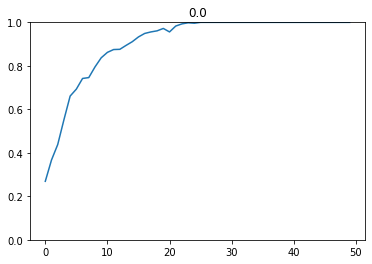

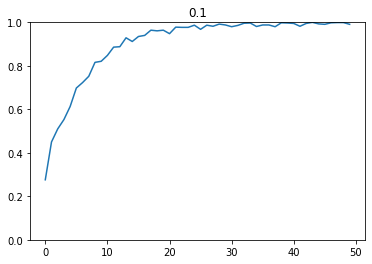

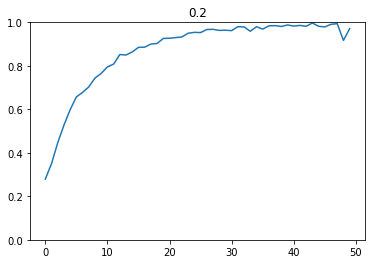

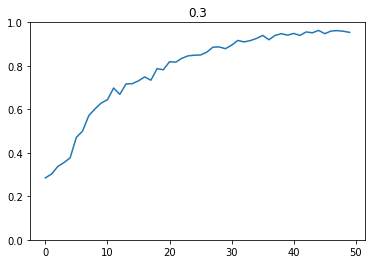

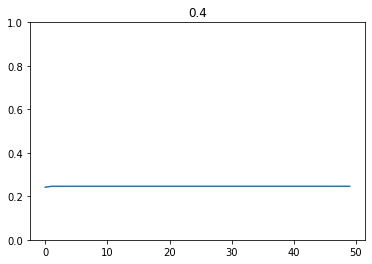

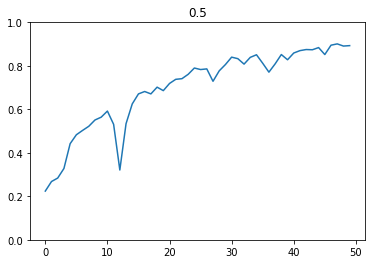

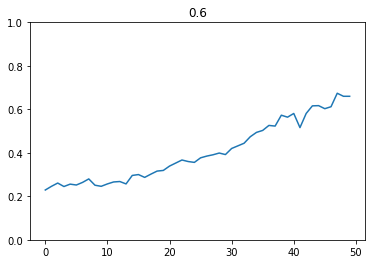

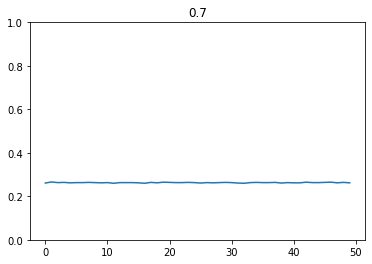

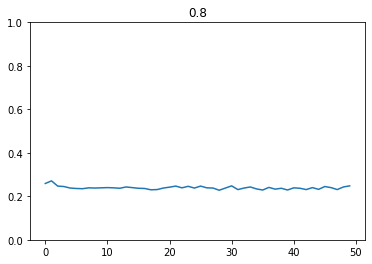

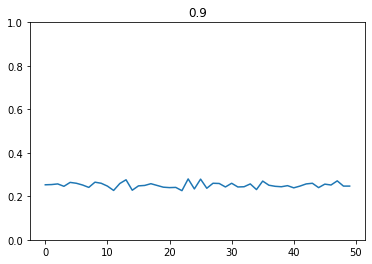

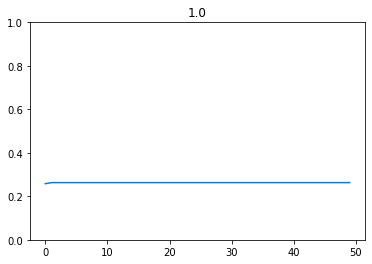

In [64]:
#@title Faire les essais

#Séparer nos données entre "train" et "test"
X_train, Y_train, X_test, Y_test=(gerer_data(0.5,1,1))


val_dropout = 0
Donnees_acc = []
acc_test = []
for i in range(11):
  val_dropout = i/10
  print(val_dropout)
  modele = creation_modele(val_dropout)
  Historique = modele.fit(np.asarray(X_train), np.asarray(Y_train), epochs=50, batch_size=10)
  Donnees_acc.append(Historique.history['acc'])
  acc_test.append(modele.evaluate(np.asarray(X_test), np.asarray(Y_test)))


for i in range(len(Donnees_acc)):
  plt.title(str(i/10))
  plt.ylim(0,1)
  plt.plot(Donnees_acc[i])
  plt.show()



In [66]:
for i in acc_test:
  print(i[1])

0.947
0.958
0.958
0.957
0.254
0.864
0.389
0.237
0.263
0.254
0.237


# Chargements

In [0]:
#@title CHARGER LE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


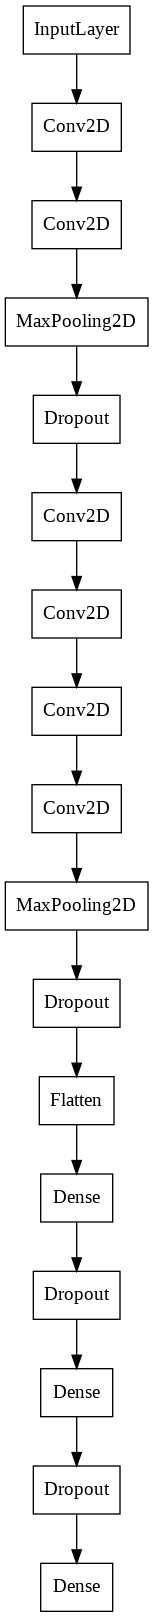

In [45]:
#@title CHARGER LE MODELE

from keras.models import load_model
model = load_model('drive/My Drive/Colab Notebooks/modele 1') #modele nom

from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=False, show_layer_names=False,expand_nested=True )

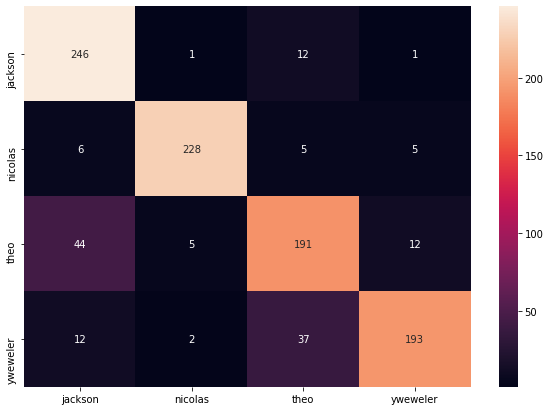

In [58]:



import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def mat_conf(cm): 
  df_cm = pd.DataFrame(cm, index = [i for i in ["jackson","nicolas","theo","yweweler"]],
                        columns = [i for i in ["jackson","nicolas","theo","yweweler"]])
# df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)],
#                      columns = [i for i in range(0,10)])
  plt.figure(figsize = (10,7))
  return sn.heatmap(df_cm, annot=True,fmt='g')

from sklearn import metrics
cm = confusion_matrix(Y_test_mat,Y_pred_mat)
mat_conf(cm)